# KNN Model Using sklearn

In [1]:
# Supervised Machine learning method
# No missing value should be in the data
# Features should be continious
# KNeighborsClassifier(algorithm='auto', leaf_size=30,metric='minkowski',metric_params=None, n_jobs=1, n_neighbors=6, p=2,weights='uniform')

from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading data from sklearn package
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X,columns=iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state= 100, stratify=y)

1. CREATING SIMPLE MODEL WITH n_neighbors = 8

In [4]:
# Creating KNN classifier object and predicting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn.score(X_test, y_test) # Accuracy test
y_pred = knn.predict(X_test)
R2 = knn.score(X_test,y_test)
R2

0.9333333333333333

2.FINDING OPTIMUM VALUE FOR n_neighbors USING PLOT

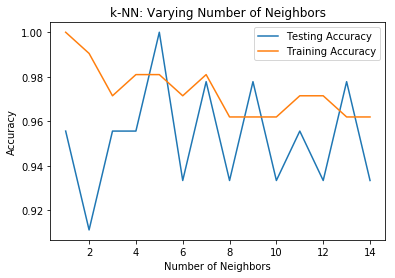

In [5]:
# Trying and plotting with different n_neighbors
neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knnGraph = KNeighborsClassifier(n_neighbors=k)
    knnGraph.fit(X_train, y_train)

    train_accuracy[i] = knnGraph.score(X_train, y_train)
    test_accuracy[i] = knnGraph.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

3 ADDITIONAL MODEL EVALUATORS

In [6]:
# Analysing result through accuracy is not always good when class frecuency are different  ( Class imbalance)
# Use confusion Matrix ( Binary class)
# Accuracy = Tp + Tn / (Tp + Fp + Tn + Fn)
# Precision = Tp / ( Tp + Fp)
# Recall = sensitivy = hit rate = Tp / (Tp + Fn)
# F1 score  = 2 Precision * recall / precision + recall

# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  3, 12]], dtype=int64)

In [7]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       0.83      1.00      0.91        15
          2       1.00      0.80      0.89        15

avg / total       0.94      0.93      0.93        45



4 HYPER TUNNING USING GRID SEARCH

In [8]:
# Hyper tunning for k ugeing grid serch and cross validation

from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 6}
0.98
